In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def compute_probability(col):
    """
    Compute the probability of a certain event
    """
    return col.value_counts() / col.shape[0]

def compute_entropy(col):
    """
    Compute the entropy of a certain event
    """
    probabilities = compute_probability(col)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

def compute_conditional_entropy(x, y):
    """
    Compute the conditional entropy between two random variables.
    Specifically, the conditional entropy of Y given X.
    """
    probability_x = compute_probability(x)
    
    temp_df = pd.DataFrame({'X': x, 'Y': y})
    
    conditional_entropy = 0
    
    # for unique event x_i
    for x_i in x.unique():
        # get the data for Y given X=x_i
        y_given_x = temp_df.loc[temp_df['X'] == x_i, 'Y']
        
        # compute the conditional entropy
        conditional_entropy += probability_x[x_i] * compute_entropy(y_given_x)
    
    return conditional_entropy

def compute_information_gain(x, y):
    """
    Compute the information gain between an attribute and class label
    """
    return compute_entropy(y) - compute_conditional_entropy(x, y)

In [14]:
# Load the three separate CSV files
low_quality_df = pd.read_csv('lowquality_final_merged.csv')
mid_quality_df = pd.read_csv('midquality_final_merged.csv')
high_quality_df = pd.read_csv('highquality_final_merged.csv')

# Add classification column based on rating range
low_quality_df['Classification'] = 'low'
mid_quality_df['Classification'] = 'mid'
high_quality_df['Classification'] = 'high'

# Concatenate the three DataFrames
combined_quality_df = pd.concat([low_quality_df, mid_quality_df, high_quality_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_quality_df.to_csv('combined_quality_ratings.csv', index=False)

combined_quality_df


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,Filtered-Title,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,Classification
0,276744,038550120X,7,painted house,JOHN GRISHAM,2001,Doubleday,"[2000, 2020)",2556,325,...,painted house,torrance,california,usa,-1,others,8447,5,6,low
1,16877,038550120X,9,painted house,JOHN GRISHAM,2001,Doubleday,"[2000, 2020)",2556,325,...,painted house,houston,others,usa,37,20~40,3767,23,6,low
2,16877,0743211383,3,dreamcatcher,Stephen King,2001,Scribner,"[2000, 2020)",5762,1062,...,dreamcatcher,houston,others,usa,37,20~40,3767,23,6,low
3,16877,0786868716,10,five people meet heaven,Mitch Albom,2003,Hyperion,"[2000, 2020)",4496,579,...,five people meet heaven,houston,others,usa,37,20~40,3767,23,6,low
4,16877,034539657X,7,dark river heart,Dean R. Koontz,1995,Ballantine Books,"[1980, 2000)",1417,111,...,dark river heart,houston,others,usa,37,20~40,3767,23,6,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197855,35433,3499123665,10,die hexen von eastwick roman,John Updike,1987,Rowohlt Tb.,"[1980, 2000)",3145,1018,...,die hexen von eastwick roman,wangen,others,others,40,20~40,8858,23,3,high
197856,35433,3499150425,10,garp und wie er die welt sah,John Irving,1982,Rowohlt Tb.,"[1980, 2000)",3083,1018,...,garp und wie er die welt sah,wangen,others,others,40,20~40,8858,23,3,high
197857,35433,3548253881,9,da spiel,Stephen King,2002,Ullstein Tb,"[2000, 2020)",5762,1223,...,da spiel,wangen,others,others,40,20~40,8858,23,3,high
197858,35433,3596259924,7,die unertragliche leichtigkeit de seins unbear...,Milan Kundera,1997,Distribooks Inc,"[1980, 2000)",4476,314,...,die unertragliche leichtigkeit de seins unbear...,wangen,others,others,40,20~40,8858,23,3,high


In [5]:
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(combined_quality_df[feature], combined_quality_df['Classification']).round(4))

User-City_Encoded 0.6791
Book-Rating 0.0055
Book-Author-Encode 0.101
Book-Publisher-Encode 0.0434
User-Country_Encoded 0.0086
User-State_Encoded 0.0224
Year-Of-Publication-Bin-Encode 0.0028
User-Age 0.0638


In [6]:
# User City has highest information gain so proceed we choose user city to perform first split on
 
X = combined_quality_df[['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age']]
y = combined_quality_df['Classification']

dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
                           )
dt.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

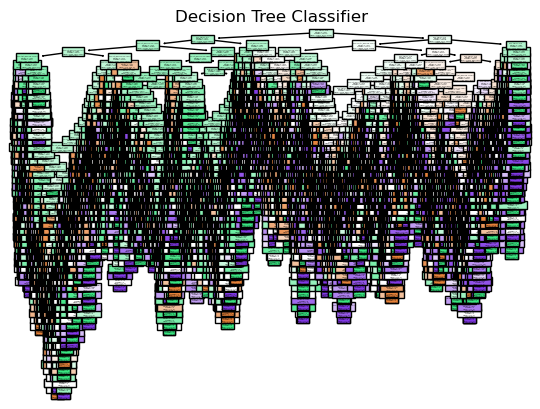

In [8]:
plot_tree(dt, # the DT classifier
          feature_names=['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age'], # feature names
          class_names=['low', 'mid','high'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()

In [16]:
sample_df = combined_quality_df.sample(frac = 0.001, random_state = 42)
sample_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,Filtered-Title,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,Classification
75393,128192,0446606189,8,cat mouse alex cross novel,James Patterson,1998,Warner Books,"[1980, 2000)",2694,1277,...,cat mouse alex cross,brush prairie,washington,usa,-1,others,1089,32,6,low
136277,7286,0140502343,10,story ferdinand picture puffin,Munro Leaf,1977,Puffin Books,"[1960, 1980)",4532,947,...,ferdinand picture puffin,pasco,washington,usa,28,20~40,6361,32,6,mid
143974,174216,0345426037,10,broken heart club conrad voort novel paperback,Ethan Black,2000,Ballantine Books,"[2000, 2020)",1893,111,...,broken heart club conrad voort,hamilton,others,usa,36,20~40,3396,23,6,high
72609,21425,0553294385,8,robot,ISAAC ASIMOV,1991,Spectra,"[1980, 2000)",2416,1115,...,robot,virginia beach,others,usa,60,40~60,8768,23,6,low
121119,142584,0451163524,7,drawing three dark tower book,Stephen King,1997,Signet Book,"[1980, 2000)",5762,1081,...,drawing three dark tower,hot springs,others,usa,21,20~40,3762,23,6,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30302,146207,0515119652,7,heart tonight always matter choice ending begi...,Nora Roberts,1996,Jove Books,"[1980, 2000)",4684,625,...,heart tonight always matter choice ending begi...,lubbock,texas,usa,36,20~40,4793,28,6,low
77002,235374,051511264X,6,prime witness,Steven Paul Martini,1994,Jove Books,"[1980, 2000)",5801,625,...,prime witness,desoto,texas,usa,53,40~60,2132,28,6,low
115954,219593,1569472424,8,death red heroine,Qiu Xiaolong,2001,Soho Press,"[2000, 2020)",5038,1109,...,death red heroine,san francisco,california,usa,-1,others,7294,5,6,mid
151748,98758,0380814676,8,mike nelson movie megacheese,Michael J. Nelson,2000,Perennial Currents,"[2000, 2020)",4390,881,...,mike nelson movie megacheese,calgary,alberta,canada,25,20~40,1214,0,1,high


In [18]:
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(sample_df[feature], sample_df['Classification']).round(4))

User-City_Encoded 1.3866
Book-Rating 0.0579
Book-Author-Encode 1.3565
Book-Publisher-Encode 0.8209
User-Country_Encoded 0.0504
User-State_Encoded 0.1386
Year-Of-Publication-Bin-Encode 0.0129


KeyError: 'User-Age-Encoded'